In [3]:
# In 01_data_exploration.ipynb
#loading data and checking the columns
import pandas as pd

# Load the Intake and Outcome datasets.
# Adjust the path if your files are not inside a 'data' folder
df_intake = pd.read_csv(r'D:\5sem\mini\data\Austin_Animal_Center_Outcomes.csv')
df_outcomes = pd.read_csv(r'D:\5sem\mini\data\Austin_Animath_Center_Intakes.csv')

print("--- INTAKE DATASET HEAD ---")
print(df_intake.head())
print("\n--- INTAKE DATASET INFO ---")
df_intake.info()

print("\n--- OUTCOME DATASET HEAD ---")
print(df_outcomes.head())
print("\n--- OUTCOME DATASET INFO ---")
df_outcomes.info()

--- INTAKE DATASET HEAD ---
  Animal ID   Name                DateTime               MonthYear  \
0   A794011  Chunk  05/08/2019 06:20:00 PM  05/08/2019 06:20:00 PM   
1   A776359  Gizmo  07/18/2018 04:02:00 PM  07/18/2018 04:02:00 PM   
2   A821648    NaN  08/16/2020 11:38:00 AM  08/16/2020 11:38:00 AM   
3   A720371  Moose  02/13/2016 05:59:00 PM  02/13/2016 05:59:00 PM   
4   A674754    NaN  03/18/2014 11:47:00 AM  03/18/2014 11:47:00 AM   

  Date of Birth Outcome Type Outcome Subtype Animal Type Sex upon Outcome  \
0    05/02/2017    Rto-Adopt             NaN         Cat    Neutered Male   
1    07/12/2017     Adoption             NaN         Dog    Neutered Male   
2    08/16/2019   Euthanasia             NaN       Other          Unknown   
3    10/08/2015     Adoption             NaN         Dog    Neutered Male   
4    03/12/2014     Transfer         Partner         Cat      Intact Male   

  Age upon Outcome                               Breed              Color  
0          2

In [4]:
# In 01_data_exploration.ipynb
#datd information
import pandas as pd
print("\n--- INTAKE DATASET INFO ---")
df_intake.info()

print("\n--- OUTCOME DATASET INFO ---")
df_outcomes.info()


--- INTAKE DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB

--- OUTCOME DATASET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column        

In [5]:
# Ensure you are using the correct column names for the merge
# 'Animal ID' is typically the unique ID for the physical animal
#identifying key and the common column for merging
df_merged = pd.merge(df_intake, df_outcomes, on='Animal ID', how='left', suffixes=('_intake', '_outcome'))

# Check the result
print(df_merged.head())
print(df_merged.shape)



  Animal ID Name_intake         DateTime_intake        MonthYear_intake  \
0   A794011       Chunk  05/08/2019 06:20:00 PM  05/08/2019 06:20:00 PM   
1   A776359       Gizmo  07/18/2018 04:02:00 PM  07/18/2018 04:02:00 PM   
2   A821648         NaN  08/16/2020 11:38:00 AM  08/16/2020 11:38:00 AM   
3   A720371       Moose  02/13/2016 05:59:00 PM  02/13/2016 05:59:00 PM   
4   A720371       Moose  02/13/2016 05:59:00 PM  02/13/2016 05:59:00 PM   

  Date of Birth Outcome Type Outcome Subtype Animal Type_intake  \
0    05/02/2017    Rto-Adopt             NaN                Cat   
1    07/12/2017     Adoption             NaN                Dog   
2    08/16/2019   Euthanasia             NaN              Other   
3    10/08/2015     Adoption             NaN                Dog   
4    10/08/2015     Adoption             NaN                Dog   

  Sex upon Outcome Age upon Outcome  ...        DateTime_outcome  \
0    Neutered Male          2 years  ...  05/02/2019 04:51:00 PM   
1    Neute

In [7]:
#Convert the date strings to datetime objects
df_merged['DateTime_intake'] = pd.to_datetime(df_merged['DateTime_intake'])
df_merged['DateTime_outcome'] = pd.to_datetime(df_merged['DateTime_outcome'])

# Extract Year and Month from the OUTCOME date (for adoption trends)
df_merged['Outcome_Year'] = df_merged['DateTime_outcome'].dt.year
df_merged['Outcome_Month'] = df_merged['DateTime_outcome'].dt.month

# Calculate Time Spent in Shelter (useful feature for predicting outcome)
df_merged['Days_in_Shelter'] = (df_merged['DateTime_outcome'] - df_merged['DateTime_intake']).dt.days
#Create Season Feature: Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_merged['Outcome_Season'] = df_merged['Outcome_Month'].apply(get_season)

# Drop rows where location is missing, as you cannot geocode it.
df_merged.dropna(subset=['Found Location'], inplace=True)

# Simplify addresses by keeping the city/state (e.g., "Austin, TX")
df_merged['Location_Clean'] = df_merged['Found Location'].apply(lambda x: x.split('/')[0].strip())

In [8]:
# Assuming your raw dataframes are df_intake and df_outcomes

# Merge the datasets on the common identifier
df_merged = pd.merge(
    df_intake, 
    df_outcomes, 
    on='Animal ID', 
    how='left', 
    suffixes=('_intake', '_outcome')
)

print(f"Merged DataFrame shape: {df_merged.shape}")

Merged DataFrame shape: (161243, 23)


In [9]:
# Define the known date format for the AAC dataset
DATE_FORMAT = '%m/%d/%Y %I:%M:%S %p'

# Convert date columns to datetime objects
df_merged['DateTime_intake'] = pd.to_datetime(
    df_merged['DateTime_intake'], 
    format=DATE_FORMAT, 
    errors='coerce'
)

df_merged['DateTime_outcome'] = pd.to_datetime(
    df_merged['DateTime_outcome'], 
    format=DATE_FORMAT, 
    errors='coerce'
)

# Extract key temporal features from the OUTCOME date (used for forecasting)
df_merged['Outcome_Year'] = df_merged['DateTime_outcome'].dt.year
df_merged['Outcome_Month'] = df_merged['DateTime_outcome'].dt.month
df_merged['Outcome_DayOfWeek'] = df_merged['DateTime_outcome'].dt.dayofweek # 0=Monday, 6=Sunday

# Calculate Days in Shelter (useful as a predictor later)
df_merged['Days_in_Shelter'] = (df_merged['DateTime_outcome'] - df_merged['DateTime_intake']).dt.days
# Filter the data to keep only records where the Outcome Date is >= Intake Date
df_merged_clean = df_merged[df_merged['Days_in_Shelter'] >= 0].copy()

print(f"Original merged rows: {df_merged.shape[0]}")
print(f"Cleaned merged rows (filtered negative stays): {df_merged_clean.shape[0]}")

        
df_merged['Outcome_Season'] = df_merged['Outcome_Month'].apply(get_season)

print("\nTemporal Feature Engineering Complete.")
print("Check the first few rows with new features:")
print(df_merged_clean[['DateTime_intake', 'DateTime_outcome', 'Days_in_Shelter']].head())

Original merged rows: 161243
Cleaned merged rows (filtered negative stays): 19105

Temporal Feature Engineering Complete.
Check the first few rows with new features:
       DateTime_intake    DateTime_outcome  Days_in_Shelter
4  2016-02-13 17:59:00 2016-02-15 10:37:00              1.0
15 2015-03-16 14:50:00 2015-03-16 18:48:00              0.0
31 2017-10-05 15:36:00 2017-10-18 18:32:00             13.0
34 2018-08-23 18:05:00 2018-08-29 13:44:00              5.0
45 2014-07-02 19:01:00 2014-07-15 18:02:00             12.0


In [10]:
# --- STEP: Filter and Clean Data for Unique Final Outcomes ---

# 1. Filter out mathematically impossible stays (Negative Days in Shelter)
# This removes invalid data points
df_merged_clean = df_merged[df_merged['Days_in_Shelter'] >= 0].copy()
print(f"Filtered (Valid Stays) DataFrame shape: {df_merged_clean.shape}")

# 2. Sort by ID and Time: Prepare to select the final event for each animal
# We sort by the Animal ID and then the Outcome Date (ascending)
df_merged_clean.sort_values(
    by=['Animal ID', 'DateTime_outcome'], 
    ascending=True, 
    inplace=True
)

# 3. Keep only the last (final) outcome event for each Animal ID
# This creates a clean dataset of unique animals and their final outcome at the shelter.
df_final_outcomes = df_merged_clean.drop_duplicates(
    subset=['Animal ID'], 
    keep='last'
).copy()

print(f"Final Unique Outcomes DataFrame shape: {df_final_outcomes.shape}")

# --- Proceed to Time Series Aggregation using df_final_outcomes ---

Filtered (Valid Stays) DataFrame shape: (19105, 28)
Final Unique Outcomes DataFrame shape: (10682, 28)


In [11]:
# --- IMPORTANT: Ensure the previous merge step was run correctly first. ---

# Define the known date format for the AAC dataset
DATE_FORMAT = '%m/%d/%Y %I:%M:%S %p'

# Convert date columns to datetime objects
# Note: These columns are assumed to be named 'DateTime_intake' and 'DateTime_outcome' after the merge.
df_merged['DateTime_intake'] = pd.to_datetime(
    df_merged['DateTime_intake'], 
    format=DATE_FORMAT, 
    errors='coerce'
)

df_merged['DateTime_outcome'] = pd.to_datetime(
    df_merged['DateTime_outcome'], 
    format=DATE_FORMAT, 
    errors='coerce'
)

# Calculate Days in Shelter (will be used for filtering)
df_merged['Days_in_Shelter'] = (df_merged['DateTime_outcome'] - df_merged['DateTime_intake']).dt.days

# 1. Filter out mathematically impossible stays (Days_in_Shelter < 0)
df_merged_clean = df_merged[df_merged['Days_in_Shelter'] >= 0].copy()
print(f"Filtered (Valid Stays) DataFrame shape: {df_merged_clean.shape}")

# 2. Sort by ID and Time: Prepare to select the final event for each animal
# This handles animals that enter/exit the shelter multiple times.
df_merged_clean.sort_values(
    by=['Animal ID', 'DateTime_outcome'], 
    ascending=True, 
    inplace=True
)

# 3. Keep only the last (final) outcome event for each Animal ID
df_final_outcomes = df_merged_clean.drop_duplicates(
    subset=['Animal ID'], 
    keep='last'
).copy()

print(f"Final Unique Outcomes DataFrame shape: {df_final_outcomes.shape}")

# Re-extract key temporal features from the clean dataset
df_final_outcomes['Outcome_Year'] = df_final_outcomes['DateTime_outcome'].dt.year
df_final_outcomes['Outcome_Month'] = df_final_outcomes['DateTime_outcome'].dt.month

# Function to create the Seasonal Feature (required by project scope)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
        
df_final_outcomes['Outcome_Season'] = df_final_outcomes['Outcome_Month'].apply(get_season)
# Insert this *before* your aggregation code
print(df_final_outcomes.columns)

print("\nFinal Data Preparation Complete. Ready for Aggregation.")

Filtered (Valid Stays) DataFrame shape: (19105, 28)
Final Unique Outcomes DataFrame shape: (10682, 28)
Index(['Animal ID', 'Name_intake', 'DateTime_intake', 'MonthYear_intake',
       'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Animal Type_intake', 'Sex upon Outcome', 'Age upon Outcome',
       'Breed_intake', 'Color_intake', 'Name_outcome', 'DateTime_outcome',
       'MonthYear_outcome', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type_outcome', 'Sex upon Intake',
       'Age upon Intake', 'Breed_outcome', 'Color_outcome', 'Outcome_Year',
       'Outcome_Month', 'Outcome_DayOfWeek', 'Days_in_Shelter',
       'Outcome_Season'],
      dtype='object')

Final Data Preparation Complete. Ready for Aggregation.


In [12]:
# --- IMPORTANT: We are using the CLEAN df_final_outcomes DataFrame ---


# --- REVISED FILTERING CODE ---

# 1. Filter the data to include ONLY 'Adoption' outcomes
# Replace 'Outcome Type_outcome' with the correct column name, e.g., 'Outcome Type'
df_adoptions = df_final_outcomes[
    df_final_outcomes['Outcome Type'] == 'Adoption'  
].copy()


# 2. Aggregate by Date: Group the filtered data daily (freq='D') and count the records
# The result will be a time series of daily adoption counts.
df_adoption_counts = df_adoptions.groupby(
    pd.Grouper(key='DateTime_outcome', freq='D')
).size().reset_index(name='Adoption_Count')

# 3. Final Prep: Rename the date column and set it as the index for time series modeling
df_adoption_counts.rename(columns={'DateTime_outcome': 'Date'}, inplace=True)
df_adoption_counts.set_index('Date', inplace=True)

# Remove days with zero adoptions (optional, but helps models focus on real periods)
# Alternatively, you can fill missing days later. For now, let's keep only non-zero days.
df_adoption_counts = df_adoption_counts[df_adoption_counts['Adoption_Count'] > 0]

print("--- DAILY ADOPTION TIME SERIES READY ---")
print(df_adoption_counts.head())
print(df_adoption_counts.tail())
print(f"Total data points in time series: {df_adoption_counts.shape[0]}")

--- DAILY ADOPTION TIME SERIES READY ---
            Adoption_Count
Date                      
2013-10-04               1
2013-10-06               1
2013-10-09               2
2013-10-12               1
2013-10-13               1
            Adoption_Count
Date                      
2021-02-23               1
2021-02-24               1
2021-02-25               1
2021-03-02               4
2021-03-03               2
Total data points in time series: 2267


In [14]:
print("--- Missing Values in Merged Data (Top 10) ---")
# Calculate the percentage of missing values for each column
missing_percentage = df_merged.isnull().sum().sort_values(ascending=False) / len(df_merged) * 100

# Print only the columns with missing values and the percentage
print(missing_percentage[missing_percentage > 0].head(10))

--- Missing Values in Merged Data (Top 10) ---
Outcome Subtype        60.767909
Name_outcome           25.183729
Name_intake            24.720453
Sex upon Intake         0.506068
Animal Type_outcome     0.505448
Intake Condition        0.505448
Intake Type             0.505448
Found Location          0.505448
DateTime_outcome        0.505448
MonthYear_outcome       0.505448
dtype: float64


In [16]:
# Use the outcome type column name you successfully identified (e.g., 'Outcome Type')
# If you didn't note it, check df_final_outcomes.columns again. Let's assume it's 'Outcome Type_outcome' for now.
OUTCOME_COL = 'Outcome Type' # <-- Correct column name

print("\n--- Distribution of Final Outcomes ---")
outcome_counts = df_final_outcomes[OUTCOME_COL].value_counts()
outcome_percentage = df_final_outcomes[OUTCOME_COL].value_counts(normalize=True) * 100

outcome_summary = pd.DataFrame({
    'Count': outcome_counts,
    'Percentage': outcome_percentage.round(2)
})

print(outcome_summary)

# Key Metrics for your project:
total_adoptions = outcome_counts.get('Adoption', 0)
print(f"\nTotal Number of Adoptions Analyzed: {total_adoptions}")
print(f"Adoption Rate (of all outcomes): {outcome_percentage.get('Adoption', 0).round(2)}%")


--- Distribution of Final Outcomes ---
                 Count  Percentage
Outcome Type                      
Adoption          6146       57.55
Return to Owner   3195       29.92
Transfer          1106       10.36
Rto-Adopt          109        1.02
Euthanasia          74        0.69
Died                27        0.25
Disposal            11        0.10
Missing             10        0.09
Relocate             2        0.02

Total Number of Adoptions Analyzed: 6146
Adoption Rate (of all outcomes): 57.55%


In [18]:
# Use the correct column name: 'Intake Type'
rescue_intake_types = ['Stray', 'Wildlife', 'Abandoned']

# Filter the original merged data (df_merged) to see rescue counts
df_rescue_intakes = df_merged[df_merged['Intake Type'].isin(rescue_intake_types)]

print(f"Total Rescue-Related Intakes: {df_rescue_intakes.shape[0]}")

Total Rescue-Related Intakes: 111516


In [ ]:
# Use the correct column name for outcome type
total_transfers = df_final_outcomes[
    df_final_outcomes[OUTCOME_COL] == 'Transfer'
].shape[0]

print(f"Total Animals Transferred to Rescue/Partner Organizations: {total_transfers}")

Total Animals Transferred to Rescue/Partner Organizations: 1106


In [31]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import json
import os # Imported to check if the cache file exists

# --- 1. Setup and Initialization ---
# Initialize geocoder with a user agent
geolocator = Nominatim(user_agent="smartpaws_analyzer")

# Define a function to get coordinates
def get_coordinates(location):
    try:
        # Add context to the location to improve accuracy
        location_with_context = f"{location}, Austin, TX"
        geocode = geolocator.geocode(location_with_context)
        if geocode:
            return (geocode.latitude, geocode.longitude)
        return (None, None)
    except Exception:
        # Handle potential timeout or connection errors
        return (None, None)

# --- 2. Cache Management ---
CACHE_FILE = '../data/geocoded_locations_cache.json'
location_coords = {}
if os.path.exists(CACHE_FILE):
    try:
        with open(CACHE_FILE, 'r') as f:
            location_coords = json.load(f)
        print("Loaded existing geocoding cache.")
    except (IOError, json.JSONDecodeError):
        print("Error reading cache file. Starting with an empty cache.")
else:
    print("No existing cache found. Starting from scratch.")

# --- 3. Efficient Geocoding ---

# Filter to the top 500 most frequent unique locations (practical for project scope)
# We assume 'Found Location' is the column with the address strings
top_locations = df_merged['Found Location'].value_counts().head(500).index.tolist()
print(f"Starting geocoding for the top {len(top_locations)} unique locations...")

for i, loc in enumerate(top_locations):
    # Skip locations already in the cache
    if loc not in location_coords:
        lat_lon = get_coordinates(loc)
        location_coords[loc] = lat_lon
        print(f"Geocoded location {i+1} of {len(top_locations)}")
        time.sleep(1) # Respect Nominatim's rate limit

# Save the cache after the run
with open(CACHE_FILE, 'w') as f:
    json.dump(location_coords, f)
print("Geocoding complete. Cache saved.")

# --- 4. Mapping Coordinates (The Fixed Section) ---

# --- Corrected Mapping Code (Lines 67 and 68) ---

# Step 4c: Extract Latitude and Longitude safely
# We check if 'x' is a list/tuple type *before* accessing index [0] or [1]
df_merged['Latitude'] = mapped_coords.apply(
    lambda x: x[0] if isinstance(x, (list, tuple)) else None
)
df_merged['Longitude'] = mapped_coords.apply(
    lambda x: x[1] if isinstance(x, (list, tuple)) else None
)

print("Coordinates mapped to df_merged.")

# --- 5. Final Heatmap Data Preparation and Saving ---

# Filter for valid coordinates (where geocoding was successful)
df_heatmap_data = df_merged.dropna(subset=['Latitude', 'Longitude']).copy()

# Focus the heatmap on 'rescue' relevant intakes (Stray, Wildlife, Abandoned)
RESCUE_INTAKE_TYPES = ['Stray', 'Wildlife', 'Abandoned']
df_heatmap_data_final = df_heatmap_data[
    df_heatmap_data['Intake Type'].isin(RESCUE_INTAKE_TYPES)
].copy()

# Save the final coordinates set for the web dashboard (JSON)
heatmap_coordinates = df_heatmap_data_final[['Latitude', 'Longitude']].to_dict(orient='records')

HEATMAP_FILE_PATH = '../data/heatmap_coordinates.json'
with open(HEATMAP_FILE_PATH, 'w') as f:
    json.dump(heatmap_coordinates, f)

print(f"\nHeatmap data saved to {HEATMAP_FILE_PATH}")
print(f"Total coordinates for heatmap: {len(heatmap_coordinates)}")

print("\n--- Heatmap Feature Complete! ---")

Loaded existing geocoding cache.
Starting geocoding for the top 500 unique locations...
Geocoding complete. Cache saved.
Coordinates mapped to df_merged.

Heatmap data saved to ../data/heatmap_coordinates.json
Total coordinates for heatmap: 4171

--- Heatmap Feature Complete! ---


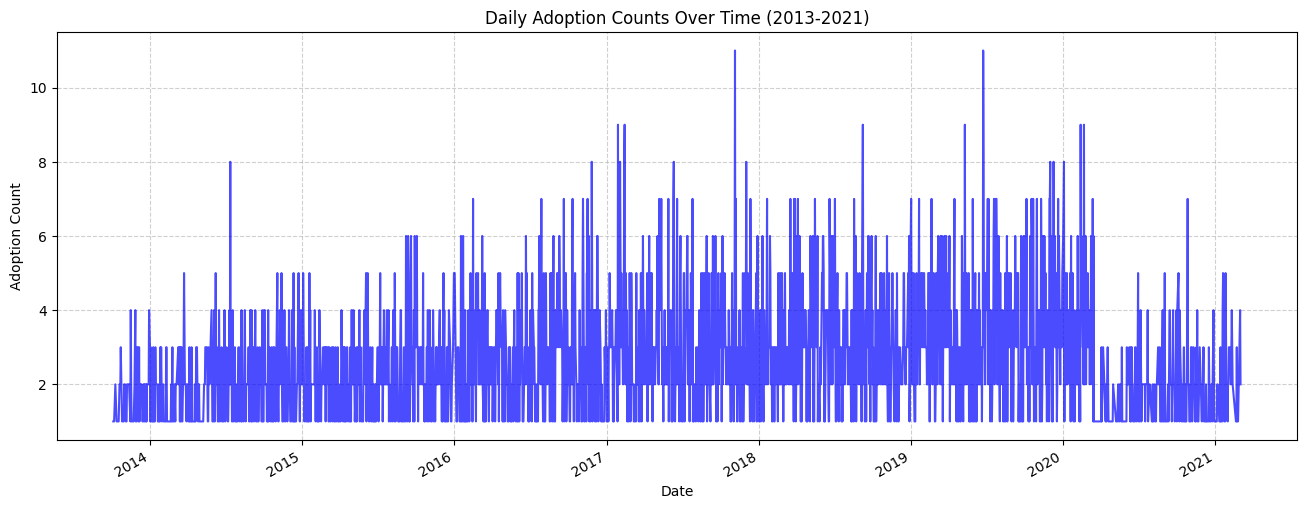

In [35]:
import matplotlib.pyplot as plt

# Assuming df_adoption_counts is your final aggregated time series
plt.figure(figsize=(16, 6))
df_adoption_counts['Adoption_Count'].plot(
    title='Daily Adoption Counts Over Time (2013-2021)',
    color='blue',
    alpha=0.7
)
plt.xlabel("Date")
plt.ylabel("Adoption Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

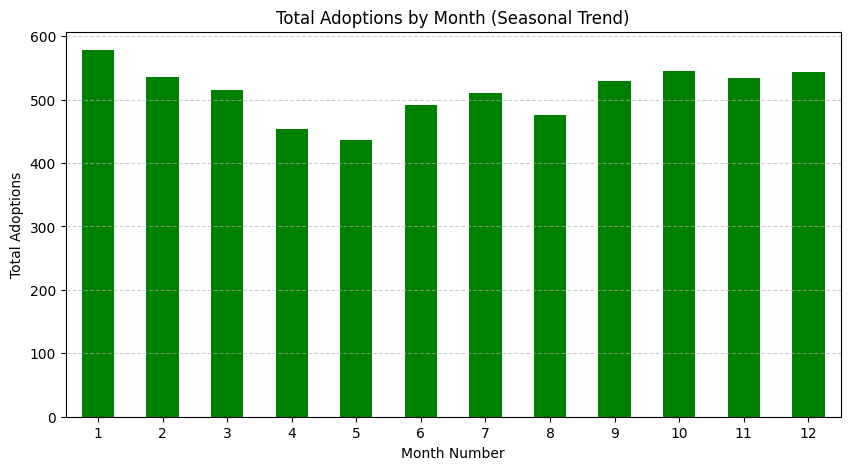

In [36]:
# Assuming df_final_outcomes is your clean, unique dataset
# Assuming 'Outcome_Season' and 'Outcome_Month' are correctly calculated

# Group by Month and Season
monthly_adoptions = df_final_outcomes[
    df_final_outcomes['Outcome Type'] == 'Adoption'
].groupby('Outcome_Month')['Animal ID'].count()

# Convert to DataFrame and plot
monthly_df = monthly_adoptions.reset_index(name='Total Adoptions')
monthly_df.set_index('Outcome_Month', inplace=True)

plt.figure(figsize=(10, 5))
monthly_df['Total Adoptions'].plot(kind='bar', color='green')
plt.title('Total Adoptions by Month (Seasonal Trend)')
plt.xlabel("Month Number")
plt.ylabel("Total Adoptions")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

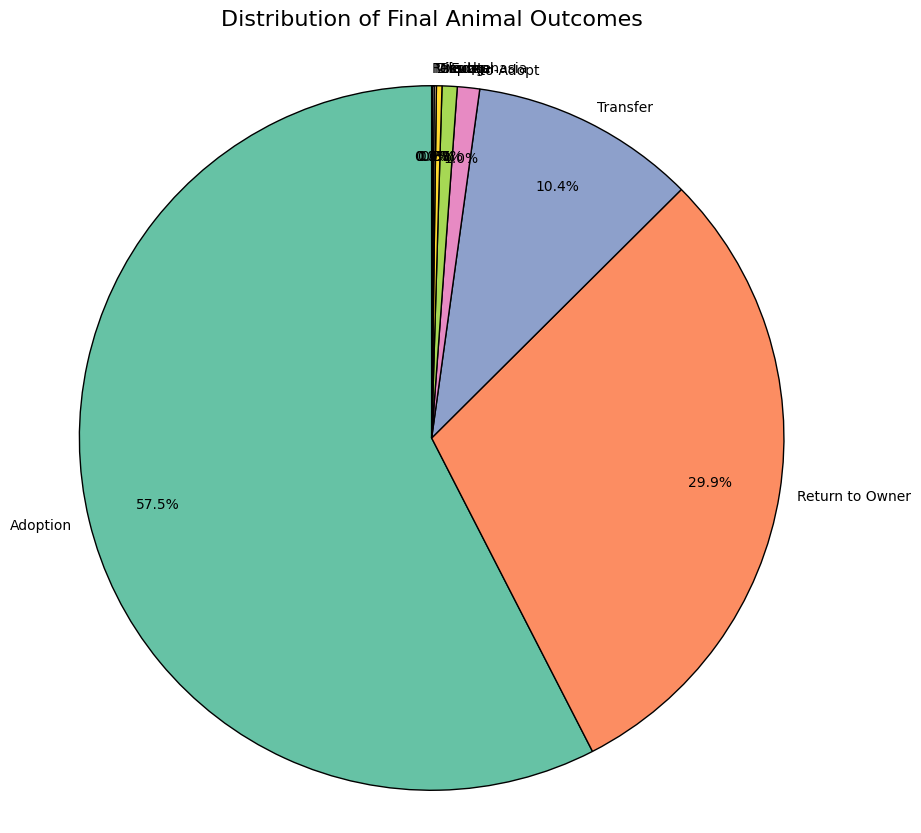

In [38]:
import matplotlib.pyplot as plt

# Assuming df_final_outcomes is your clean, unique dataset
# Assuming OUTCOME_COL is your correct Outcome Type column name ('Outcome Type')
OUTCOME_COL = 'Outcome Type' 

outcome_counts = df_final_outcomes[OUTCOME_COL].value_counts()

# --- CORRECTED PLOT CODE ---
plt.figure(figsize=(10, 10)) # 1. Increase the figure size significantly

plt.pie(
    outcome_counts, 
    labels=outcome_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    # 2. Adjust distance of percentage values from the center
    pctdistance=0.8, 
    # 3. Adjust distance of the slice labels from the center
    labeldistance=1.05, 
    colors=plt.cm.Set2.colors,
    # 4. Add 'wedgeprops' to separate the slices slightly (optional, but helps readability)
    wedgeprops={'edgecolor': 'black', 'linewidth': 1} 
)
plt.title('Distribution of Final Animal Outcomes', fontsize=16, pad=20) # 5. Give the title more padding
plt.axis('equal') 
plt.show()

In [39]:
import pandas as pd

# Assuming df_final_outcomes is your clean, unique dataset
# Assuming 'Outcome Type' is the correct outcome column name
OUTCOME_COL = 'Outcome Type' 

# Calculate the counts and percentages
outcome_counts = df_final_outcomes[OUTCOME_COL].value_counts()
outcome_percentage = df_final_outcomes[OUTCOME_COL].value_counts(normalize=True) * 100

# Create a clean DataFrame for the summary
outcome_summary_df = pd.DataFrame({
    'Count': outcome_counts,
    'Percentage': outcome_percentage.round(2)
})

print("\n\n=============================================")
print(" FINAL ANIMAL OUTCOME SUMMARY (Percentages) ")
print("=============================================")
print(outcome_summary_df)
print("=============================================\n")

# Print the key metrics requested for your project
total_adoptions = outcome_counts.get('Adoption', 0)
total_transfers = outcome_counts.get('Transfer', 0)
adoption_rate = outcome_percentage.get('Adoption', 0).round(2)

print(f"Total Unique Animals Analyzed: {df_final_outcomes.shape[0]}")
print(f"Total Confirmed Adoptions: {total_adoptions}")
print(f"Total Transfers to Rescue Partners: {total_transfers}")
print(f"Overall Adoption Rate: {adoption_rate}%")



 FINAL ANIMAL OUTCOME SUMMARY (Percentages) 
                 Count  Percentage
Outcome Type                      
Adoption          6146       57.55
Return to Owner   3195       29.92
Transfer          1106       10.36
Rto-Adopt          109        1.02
Euthanasia          74        0.69
Died                27        0.25
Disposal            11        0.10
Missing             10        0.09
Relocate             2        0.02

Total Unique Animals Analyzed: 10682
Total Confirmed Adoptions: 6146
Total Transfers to Rescue Partners: 1106
Overall Adoption Rate: 57.55%


In [41]:
import os

# Prepare Prophet training DataFrame from daily adoption counts
df_prophet = df_adoption_counts.reset_index().rename(columns={'Date': 'ds', 'Adoption_Count': 'y'})

# Ensure the 'data' directory exists
os.makedirs('data', exist_ok=True)

df_prophet.to_csv('data/prophet_training_data.csv', index=False)